In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [5]:
df.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
94,95,Female,32,60,42
27,28,Male,35,28,61
124,125,Female,23,70,29
182,183,Male,46,98,15
162,163,Male,19,81,5
188,189,Female,41,103,17
33,34,Male,18,33,92
170,171,Male,40,87,13
97,98,Female,27,60,50
183,184,Female,29,98,88


Exploratory Data Analysis (EDA)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# missing values
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
for col in df.columns:
    null_rate = round(df[col].isnull().sum()/len(df[col])*100,2)
    if null_rate > 0:
        print(f" {col}'s null rate is : {null_rate}%")
# no missing values

Pairwise relationship between Variables of the Dataset

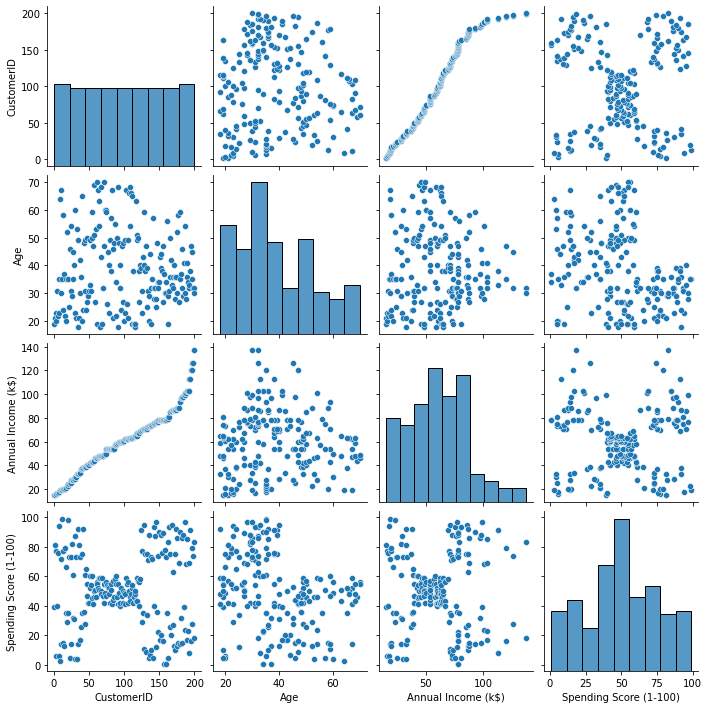

In [9]:
sns.pairplot(df)
plt.show()

Correlation

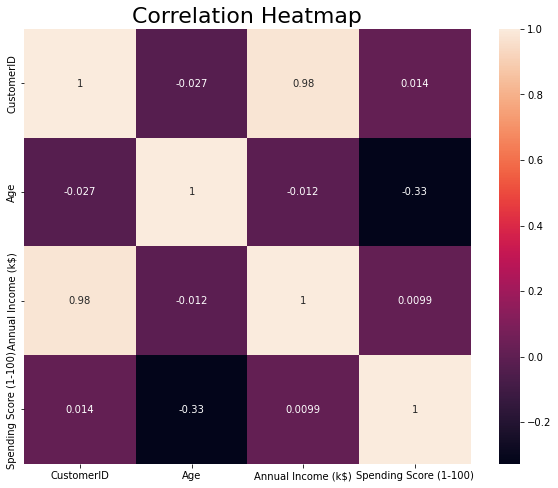

In [10]:
correlation = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True)
plt.title("Correlation Heatmap", fontsize=22)
plt.show()

From the HeatMap, age has a negative relationship with annual income and spending score, and is highly relative with spending score. As age increases, spending score decreases.

Focusing on "Spending Score"

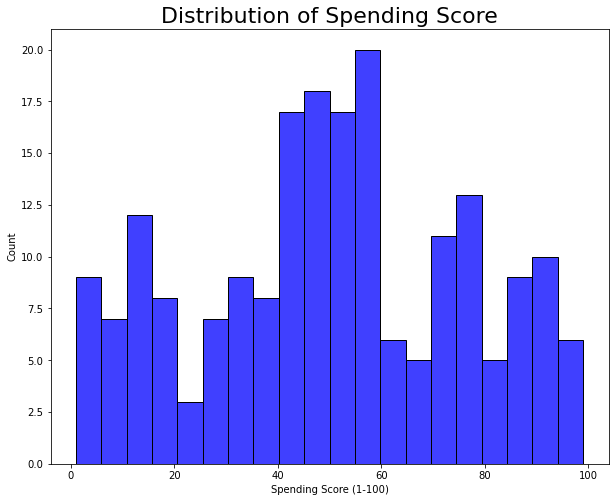

In [11]:
plt.figure(figsize=(10,8))
sns.histplot(df['Spending Score (1-100)'],bins = 20, color='b')
plt.title("Distribution of Spending Score", fontsize = 22)
plt.show()

From the histgram, we can see most of customers have a spending score between 40 to 60.

Spending Score over Age

<Figure size 864x720 with 0 Axes>

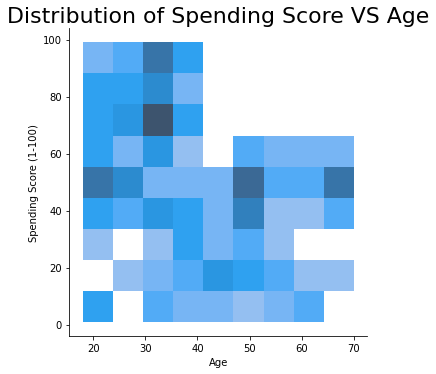

In [12]:
plt.figure(figsize=(12,10))
sns.displot(data=df,y='Spending Score (1-100)',x='Age')
plt.title("Distribution of Spending Score VS Age", fontsize= 22)
plt.show()

Age between 20 and 40 tend to have a higher spending score

Distribution of Spending Score over Annual Income

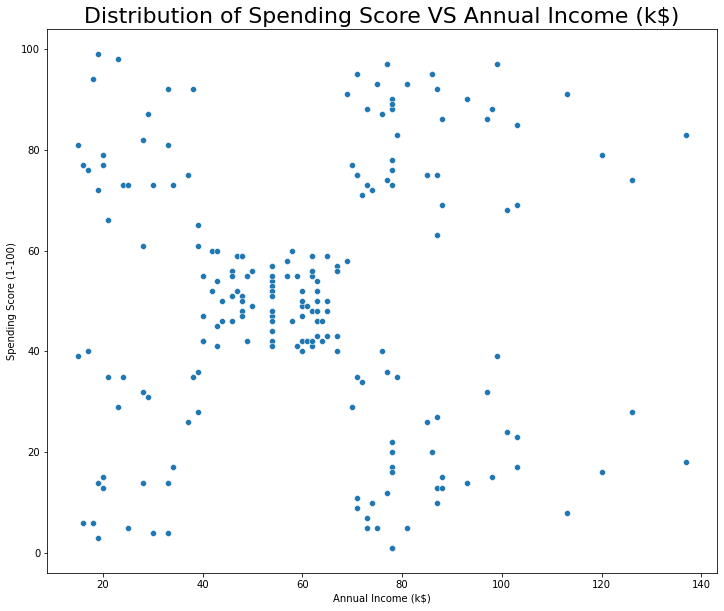

In [13]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df, y='Spending Score (1-100)', x = 'Annual Income (k$)')
plt.title("Distribution of Spending Score VS Annual Income (k$)", fontsize = 22)
plt.show()

Customers with annual income 20k~40k and 75k~100k have higher spending score.

A cluster of customers with 40k-60k annual income has spending score of 40-60.

Focus on Annual Income

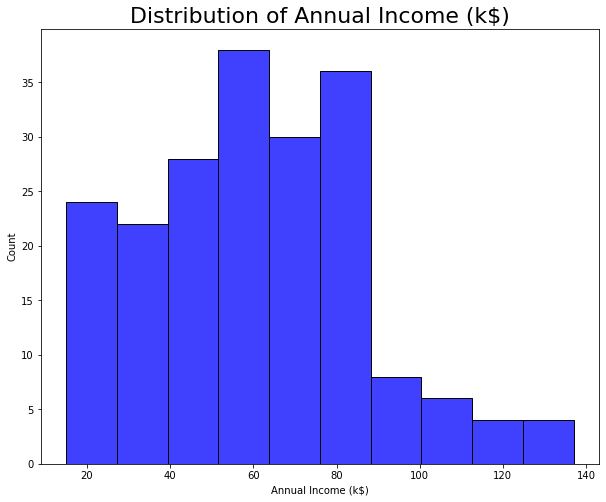

In [14]:
# Distribution of Annual Income
plt.figure(figsize=(10,8))
sns.histplot(df['Annual Income (k$)'], color= 'b')
plt.title('Distribution of Annual Income (k$)', fontsize = 22)
plt.show()

From the histgram, we can see most of the customers have annual income of 50k ~ 80k.

<Figure size 864x720 with 0 Axes>

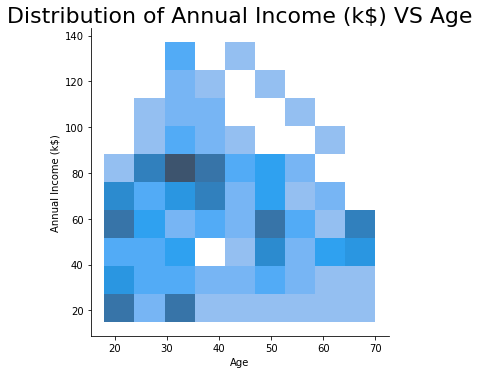

In [15]:
# Annual Income over Age
plt.figure(figsize=(12,10))
sns.displot(data=df, y='Annual Income (k$)',x = 'Age')
plt.title("Distribution of Annual Income (k$) VS Age", fontsize = 22)
plt.show()

Customers aged 30 to 50 tend to have higher annual income.

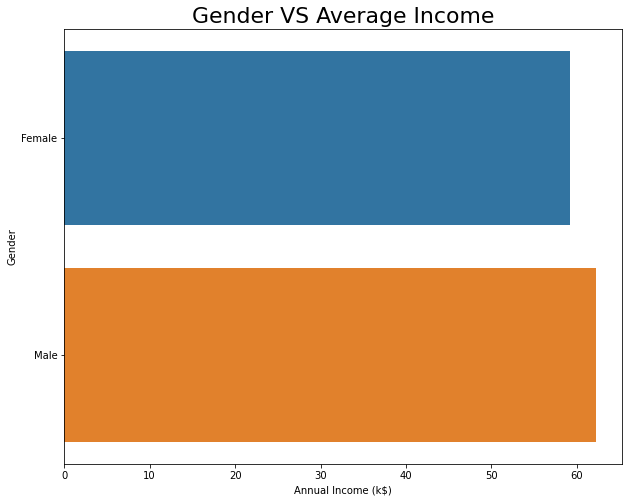

In [16]:
# average income distribution by gender
gender_income = df.groupby('Gender')['Annual Income (k$)'].agg('mean').reset_index()
plt.figure(figsize=(10,8))
sns.barplot(data=gender_income,y='Gender',x='Annual Income (k$)')
plt.title("Gender VS Average Income", fontsize = 22)
plt.show()

Male tends to have a higher annual income.

In [17]:
# descriptive statistics
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [18]:
# categorical distribution
df.select_dtypes("object").describe()

,Gender
count,200
unique,2
top,Female
freq,112


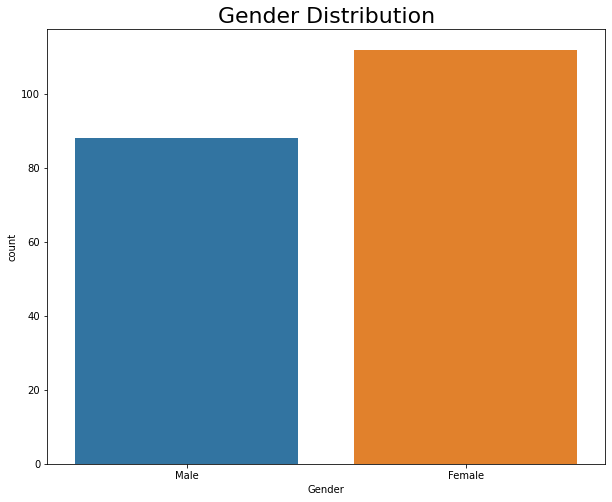

In [19]:
# gender distribution
plt.figure(figsize=(10,8))
sns.countplot(df['Gender'])
plt.title("Gender Distribution", fontsize = 22)
plt.show()

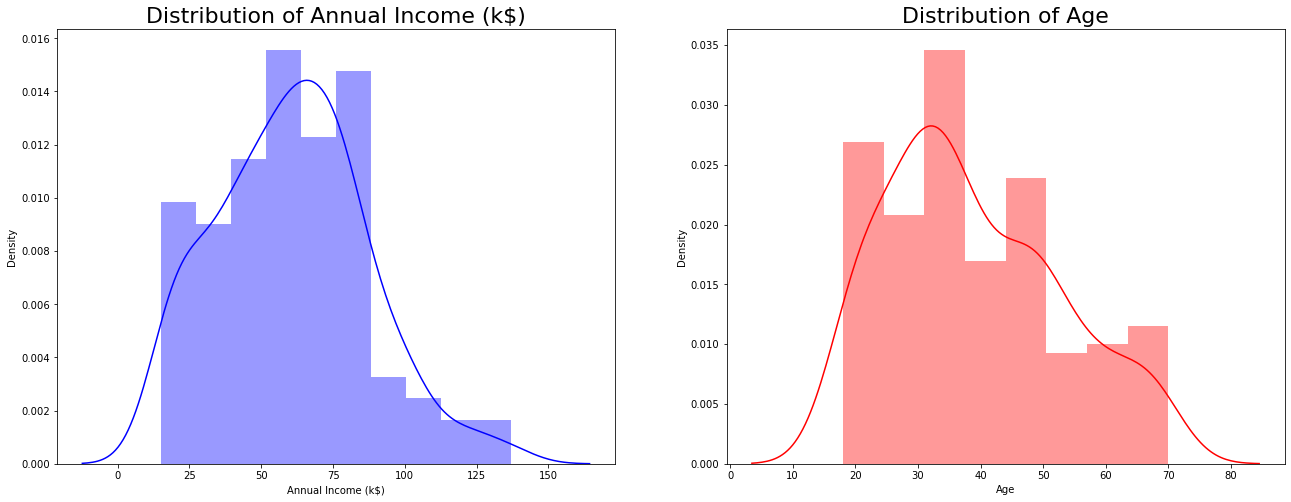

In [23]:
# distribution of annual income and age
plt.figure(figsize=(22,8))
plt.subplot(1,2,1)
sns.distplot(df['Annual Income (k$)'], color='b')
plt.title("Distribution of Annual Income (k$)", fontsize = 22)

plt.subplot(1,2,2)
sns.distplot(df['Age'], color='r')
plt.title("Distribution of Age", fontsize = 22)
plt.show()

Most of customers have an annual income of 50k to 90k, lowest is 20k, highest is 140k, few people earn more than 100k.

Most of customers aged 20 to 35, youngest is 18, oldest is 70. Senior customers are not the primary visitors.

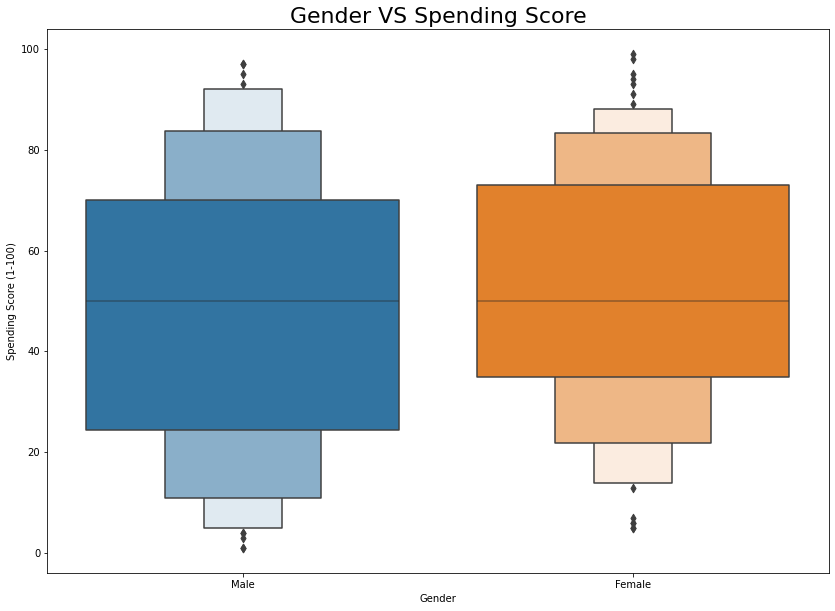

In [24]:
# gender vs spending score
plt.figure(figsize=(14,10))
sns.boxenplot(df['Gender'],df['Spending Score (1-100)'])
plt.title("Gender VS Spending Score", fontsize = 22)
plt.show()

From the box plot, we can see, female has higher spending score and is shopping leader.

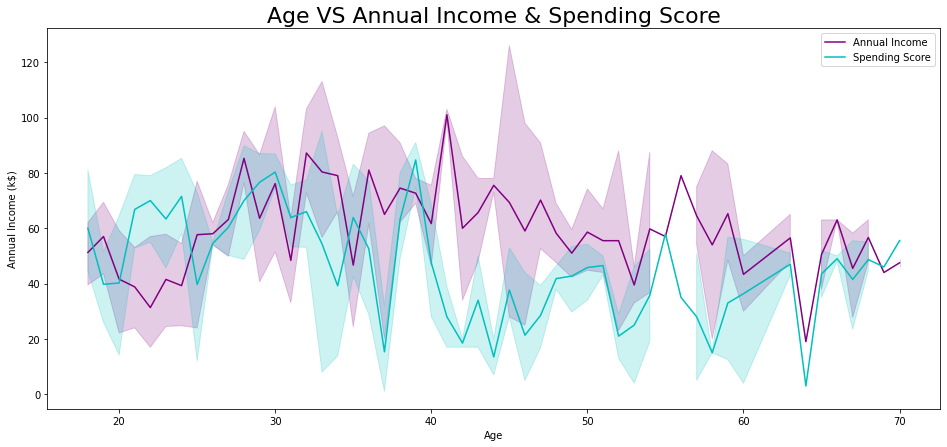

In [25]:
# age vs annual income & spending score

plt.figure(figsize=(16,7))
x=df['Age']
y=df['Annual Income (k$)']
z=df['Spending Score (1-100)']

sns.lineplot(x,y,color='purple', label="Annual Income")
sns.lineplot(x,z,color='c', label="Spending Score")
plt.title("Age VS Annual Income & Spending Score", fontsize = 22)
plt.legend()
plt.show()

Clustering

Finding Clusters based on Age Annual Income and Spending Score

In [26]:
Cluster = df.iloc[:,2:]
Cluster.shape

(200, 3)

K-Means Clustering

ELbow method: finding optimal number of Clusters.

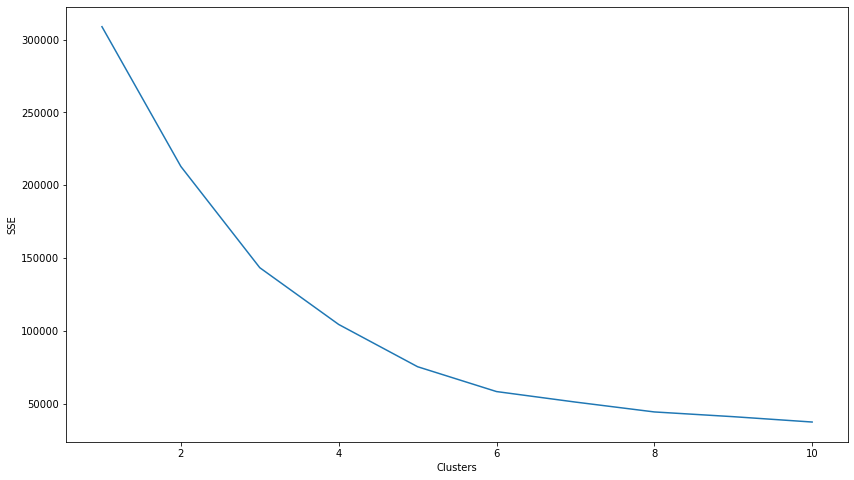

In [27]:
from sklearn.cluster import KMeans
Inter = []
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(Cluster)
    Inter.append(model.inertia_)
    
# plotting the Elbow
plt.figure(figsize=(14,8))
plt.plot(np.arange(1,11),Inter)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()    

The elbow curve shows clearly that the optimum number of clusters i.e n_clusters is 3.

In [28]:
# fitting model on optimum clusters
K_model = KMeans(n_clusters=3)
K_model.fit(Cluster)

KMeans(n_clusters=3)

In [29]:
clusters = K_model.labels_

In [30]:
# assigning fitted clusters to clustered data to visualize

Cluster = Cluster.assign(cluster = clusters)
Cluster.sample(10)

,Age,Annual Income (k$),Spending Score (1-100),cluster
146,48,77,36,2
64,63,48,51,1
151,39,78,88,0
116,63,65,43,1
108,68,63,43,1
50,49,42,52,1
77,40,54,48,1
136,44,73,7,2
86,55,57,58,1
90,68,59,55,1


In [31]:
# visualizing clusters

import plotly.express as px

fig = px.scatter_3d(Cluster, x= 'Age', y='Annual Income (k$)', z ='Spending Score (1-100)', color = 'cluster',opacity=0.7)

# tight layout
fig.update_layout(margin = dict(l=0,r=0,b=0,t=0))
